<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

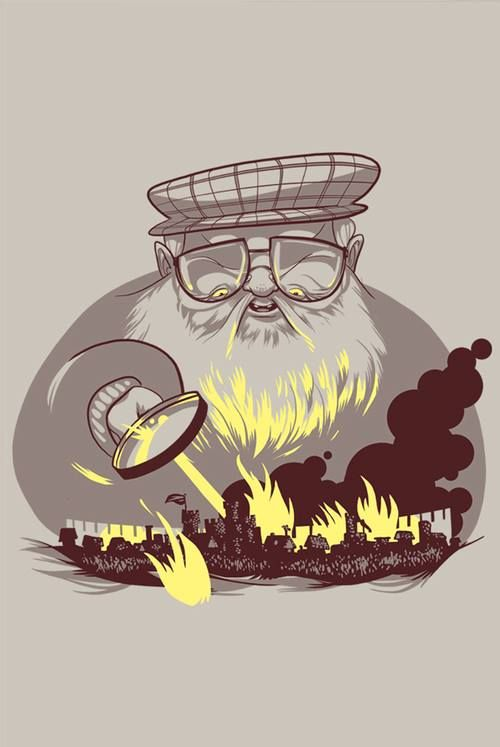

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [211]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: /content/game_of_thrones_test_old.csv
100% 38.3k/38.3k [00:00<00:00, 65.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: /content/game_of_thrones_train_old.csv
100% 141k/141k [00:00<00:00, 5.72MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [213]:
data = pd.read_csv("/content/game_of_thrones_train_old.csv", index_col="S.No")

data


,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,298.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,299.0,NaN,NaN,NaN,House Seaworth,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [214]:
data_test = pd.read_csv("/content/game_of_thrones_test_old.csv", index_col="S.No")

In [215]:
data_test["isAlive"] = 0

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   DateoFdeath       307 non-null    float64
 6   mother            18 non-null     object 
 7   father            22 non-null     object 
 8   heir              21 non-null     object 
 9   house             1176 non-null   object 
 10  spouse            200 non-null    object 
 11  book1             1557 non-null   int64  
 12  book2             1557 non-null   int64  
 13  book3             1557 non-null   int64  
 14  book4             1557 non-null   int64  
 15  book5             1557 non-null   int64  
 16  isAliveMother     18 non-null     float64
 17  

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [217]:
data['dateOfBirth'].fillna(data['dateOfBirth'].median(), inplace=True)
data['isAliveMother'].fillna(0, inplace=True)
data['isAliveFather'].fillna(0, inplace=True)
data['isAliveHeir'].fillna(0, inplace=True)
data['isAliveSpouse'].fillna(0, inplace=True)
data['age'].fillna(data['age'].median(), inplace=True)



In [218]:
data_test['dateOfBirth'].fillna(data_test['dateOfBirth'].median(), inplace=True)
data_test['isAliveMother'].fillna(0, inplace=True)
data_test['isAliveFather'].fillna(0, inplace=True)
data_test['isAliveHeir'].fillna(0, inplace=True)
data_test['isAliveSpouse'].fillna(0, inplace=True)
data_test['age'].fillna(data_test['age'].median(), inplace=True)


In [219]:
data

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,272.0,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,0.0,0,0,24.0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,272.0,NaN,NaN,NaN,NaN,House Swyft,...,0.0,0.0,0.0,0.0,0,1,24.0,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,272.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,1,24.0,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,272.0,298.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,24.0,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,272.0,299.0,NaN,NaN,NaN,House Seaworth,...,0.0,0.0,0.0,0.0,0,0,24.0,0,0.076923,0


In [220]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,0
DateoFdeath,1250
mother,1539
father,1535
heir,1536
house,381


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [221]:
if (data.popularity < 0.5).all():
  data["isPopular"] = 0
else:
  data["isPopular"] = 1


In [222]:
if (data_test.popularity < 0.5).all():
  data_test["isPopular"] = 0
else:
  data_test["isPopular"] = 1

In [223]:
if (data.numDeadRelations > 0).all():
  data["boolDeadRelations"]  = 1
else:
  data["boolDeadRelations"]  = 0

In [224]:
if (data_test.numDeadRelations > 0).all():
  data_test["boolDeadRelations"]  = 1
else:
  data_test["boolDeadRelations"]  = 0

In [225]:
data

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,272.0,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,0.0,0.0,0,0,24.0,11,0.605351,0,1,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,0.0,1.0,1,1,97.0,1,0.896321,1,1,0
3,Addison Hill,Ser,1,NaN,272.0,NaN,NaN,NaN,NaN,House Swyft,...,0.0,0.0,0,1,24.0,0,0.267559,1,1,0
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,0.0,0.0,1,1,23.0,0,0.183946,0,1,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,0.0,1.0,1,1,29.0,0,0.043478,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,272.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0,1,24.0,0,0.160535,1,1,0
1554,Masha Heddle,NaN,0,NaN,272.0,298.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,24.0,0,0.040134,0,1,0
1555,Matthos Seaworth,NaN,1,NaN,272.0,299.0,NaN,NaN,NaN,House Seaworth,...,0.0,0.0,0,0,24.0,0,0.076923,0,1,0


In [226]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
data['culture']= data['culture'].map(lambda x:[k for k,v in cult.items() for val in v if val==x][0] if [k for k,v in cult.items() for val in v if val==x] else x)

In [227]:
data_test['culture']= data_test['culture'].map(lambda x:[k for k,v in cult.items() for val in v if val==x][0] if [k for k,v in cult.items() for val in v if val==x] else x)

In [228]:
data

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,272.0,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,0.0,0.0,0,0,24.0,11,0.605351,0,1,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,0.0,1.0,1,1,97.0,1,0.896321,1,1,0
3,Addison Hill,Ser,1,NaN,272.0,NaN,NaN,NaN,NaN,House Swyft,...,0.0,0.0,0,1,24.0,0,0.267559,1,1,0
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,0.0,0.0,1,1,23.0,0,0.183946,0,1,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,0.0,1.0,1,1,29.0,0,0.043478,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,272.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0,1,24.0,0,0.160535,1,1,0
1554,Masha Heddle,NaN,0,NaN,272.0,298.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,24.0,0,0.040134,0,1,0
1555,Matthos Seaworth,NaN,1,NaN,272.0,299.0,NaN,NaN,NaN,House Seaworth,...,0.0,0.0,0,0,24.0,0,0.076923,0,1,0


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              717 non-null    object 
 2   male               1557 non-null   int64  
 3   culture            488 non-null    object 
 4   dateOfBirth        1557 non-null   float64
 5   DateoFdeath        307 non-null    float64
 6   mother             18 non-null     object 
 7   father             22 non-null     object 
 8   heir               21 non-null     object 
 9   house              1176 non-null   object 
 10  spouse             200 non-null    object 
 11  book1              1557 non-null   int64  
 12  book2              1557 non-null   int64  
 13  book3              1557 non-null   int64  
 14  book4              1557 non-null   int64  
 15  book5              1557 non-null   int64  
 16  isAliveMother      1557 non-n

In [230]:
data['culture'].fillna("no culture", inplace=True)
data['title'].fillna("no title", inplace=True)
data['house'].fillna("no house", inplace=True)

In [231]:
data_test['culture'].fillna("no culture", inplace=True)
data_test['title'].fillna("no title", inplace=True)
data_test['house'].fillna("no house", inplace=True)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [232]:
data.drop(columns=["name", "mother", "father", "heir", "popularity", "numDeadRelations", "spouse", "DateoFdeath"], inplace = True)


In [233]:
data_test.drop(columns=["name", "mother", "father", "heir", "popularity", "numDeadRelations", "spouse", "DateoFdeath"], inplace = True)

In [234]:
data_test

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1558,no title,0,no culture,156.0,House Blackwood,0,0,0,0,1,0.0,0.0,0.0,0.0,0,0,100.0,0,1,0
1559,no title,0,Asshai,267.0,R'hllor,0,1,1,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1560,no title,0,no culture,267.0,Brotherhood without banners,0,0,1,1,0,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1561,Ser,1,no culture,267.0,House Trant,1,1,1,1,1,0.0,0.0,0.0,0.0,0,1,32.0,0,1,0
1562,no title,1,Riverlands,262.0,House Frey,1,1,1,1,1,0.0,0.0,0.0,1.0,1,0,38.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,no title,1,Westeros,267.0,House Stark,1,1,1,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1943,no title,1,no culture,267.0,House Bolton,0,1,0,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1944,no title,1,no culture,267.0,no house,1,1,1,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0


In [235]:
data

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1,no title,1,no culture,272.0,no house,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,24.0,0,1,0
2,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,1,0
3,Ser,1,no culture,272.0,House Swyft,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,24.0,1,1,0
4,Queen,0,no culture,82.0,House Arryn,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,1,0
5,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,no culture,272.0,no house,1,0,1,1,0,0.0,0.0,0.0,0.0,0,1,24.0,1,1,0
1554,no title,0,no culture,272.0,no house,1,1,0,0,0,0.0,0.0,0.0,0.0,0,0,24.0,0,1,0
1555,no title,1,no culture,272.0,House Seaworth,0,1,1,1,1,0.0,0.0,0.0,0.0,0,0,24.0,0,1,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

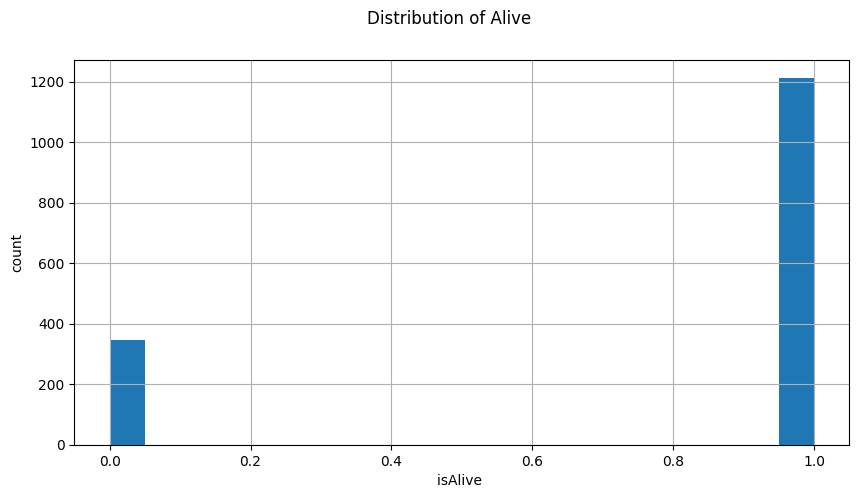

In [236]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive ')

plt.suptitle('Distribution of Alive')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [237]:
data_test

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1558,no title,0,no culture,156.0,House Blackwood,0,0,0,0,1,0.0,0.0,0.0,0.0,0,0,100.0,0,1,0
1559,no title,0,Asshai,267.0,R'hllor,0,1,1,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1560,no title,0,no culture,267.0,Brotherhood without banners,0,0,1,1,0,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1561,Ser,1,no culture,267.0,House Trant,1,1,1,1,1,0.0,0.0,0.0,0.0,0,1,32.0,0,1,0
1562,no title,1,Riverlands,262.0,House Frey,1,1,1,1,1,0.0,0.0,0.0,1.0,1,0,38.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,no title,1,Westeros,267.0,House Stark,1,1,1,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1943,no title,1,no culture,267.0,House Bolton,0,1,0,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1944,no title,1,no culture,267.0,no house,1,1,1,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0


In [238]:
data

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1,no title,1,no culture,272.0,no house,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,24.0,0,1,0
2,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,1,0
3,Ser,1,no culture,272.0,House Swyft,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,24.0,1,1,0
4,Queen,0,no culture,82.0,House Arryn,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,1,0
5,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,no culture,272.0,no house,1,0,1,1,0,0.0,0.0,0.0,0.0,0,1,24.0,1,1,0
1554,no title,0,no culture,272.0,no house,1,1,0,0,0,0.0,0.0,0.0,0.0,0,0,24.0,0,1,0
1555,no title,1,no culture,272.0,House Seaworth,0,1,1,1,1,0.0,0.0,0.0,0.0,0,0,24.0,0,1,0


In [239]:
all_data = pd.concat([data, data_test], axis = 0)
all_data

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1,no title,1,no culture,272.0,no house,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,24.0,0,1,0
2,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,1,0
3,Ser,1,no culture,272.0,House Swyft,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,24.0,1,1,0
4,Queen,0,no culture,82.0,House Arryn,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,1,0
5,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,no title,1,Westeros,267.0,House Stark,1,1,1,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1943,no title,1,no culture,267.0,House Bolton,0,1,0,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0
1944,no title,1,no culture,267.0,no house,1,1,1,1,1,0.0,0.0,0.0,0.0,0,0,32.0,0,1,0


In [240]:

categorical_columns = ["title", "culture", "house"]
categorical_features = all_data[categorical_columns]
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(all_data[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=all_data.index
                          )

In [241]:
one_hot_df

,title_Acorn Hall,title_Andals,title_Arbor,title_Archmaester,title_Ashford,title_Banefort,title_Barrowton,title_Bear Island,title_Big BucketThe Wull,title_Bitterbridge,...,house_Thenn,house_Thirteen,house_Three-eyed crow,house_Undying Ones,house_Unsullied,house_Windblown,house_Wise Masters,house_brotherhood without banners,house_no house,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [242]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([all_data, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_encoded

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,house_Thenn,house_Thirteen,house_Three-eyed crow,house_Undying Ones,house_Unsullied,house_Windblown,house_Wise Masters,house_brotherhood without banners,house_no house,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,208.0,1,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,272.0,0,0,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.0,0,0,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,267.0,1,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,1,267.0,0,1,0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,1,267.0,1,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [243]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 1 to 1946
Columns: 690 entries, male to house_wildling
dtypes: float64(679), int64(11)
memory usage: 10.3 MB


In [245]:
data = df_encoded.iloc[0:1557]
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,house_Thenn,house_Thirteen,house_Three-eyed crow,house_Undying Ones,house_Unsullied,house_Windblown,house_Wise Masters,house_brotherhood without banners,house_no house,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,208.0,1,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,272.0,0,0,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.0,0,0,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,272.0,1,0,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1554,0,272.0,1,1,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1555,1,272.0,0,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
data_test = df_encoded.iloc[1557:]
data_test = data_test.drop(columns=["isAlive"])
data_test

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,house_Thenn,house_Thirteen,house_Three-eyed crow,house_Undying Ones,house_Unsullied,house_Windblown,house_Wise Masters,house_brotherhood without banners,house_no house,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,156.0,0,0,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,0,267.0,0,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0,267.0,0,0,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,1,267.0,1,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,1,262.0,1,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,267.0,1,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,1,267.0,0,1,0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,1,267.0,1,1,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [248]:
numerical_columns = ["male",
"dateOfBirth",
"book1",
"book2",
"book3",
"book4",
"book5",
"isAliveMother",
"isAliveFather",
"isAliveHeir",
"isAliveSpouse",
"isMarried",
"isNoble",
"age",
"isAlive",
"isPopular",
"boolDeadRelations"]

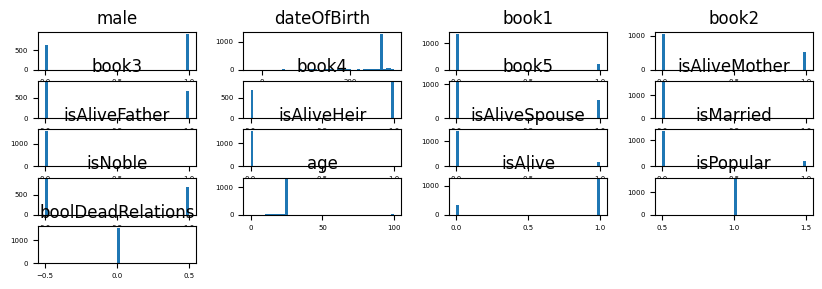

In [249]:
num_features = data[numerical_columns]
num_features.hist(figsize=(10, 3), bins=50,xlabelsize=5, ylabelsize=5, grid=False);

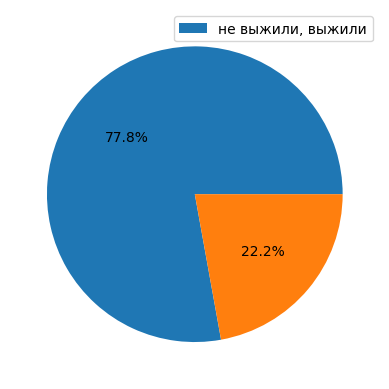

In [250]:
# Готовим данные для графика
data1 = data['isAlive'].value_counts()

# Строим круговую диаграмму
plt.pie(data1, autopct='%1.1f%%')

plt.legend(['не выжили, выжили'])

plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

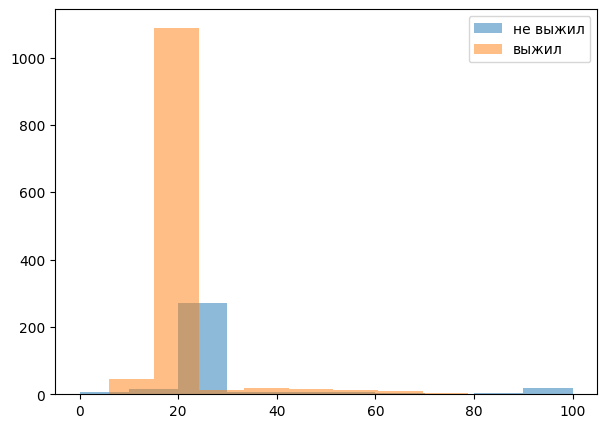

In [251]:
plt.figure(figsize=(7, 5))

plt.hist(data['age'][data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data['age'][data['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [252]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [255]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [256]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [258]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [259]:
# Шаг 1. создание модели
KNeighborsClassifier = KNeighborsClassifier()

# Шаг 2. обучение модели
KNeighborsClassifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = KNeighborsClassifier.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [260]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [262]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [261]:
# Шаг 3. Предсказание на тестовых данных
y_pred = KNeighborsClassifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [263]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.13MB/s]


In [264]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [265]:
y_pred = KNeighborsClassifier.predict(data_test)
submission["isAlive"] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [266]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [267]:
submission.to_csv("/content/new_submission.csv", index=False)